In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.metrics import accuracy_score

In [2]:
df_mushroom = pd.read_csv("D:/ISB_AMPBA/MLSL/Individual_Assignment/Q2/mushrooms.csv")

In [3]:
df_mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df_mushroom.shape

(8124, 23)

Below from the we can see that Dtype is object for each column and describing we can see that two classes are there e and p 

In [5]:
df_mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df_mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


From Below we can say that class data is balanced so no imbalancement correction is required

In [7]:
df_mushroom['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

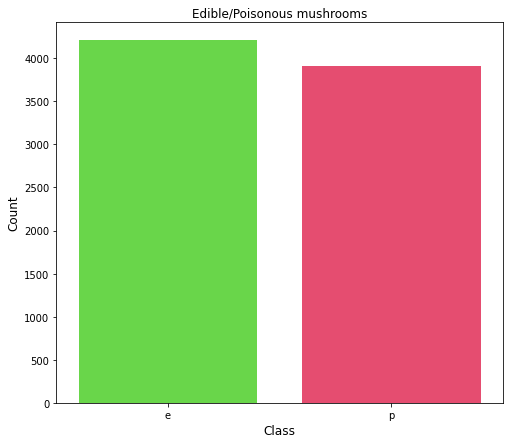

In [8]:
count = df_mushroom['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(x= count.index, y=count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Edible/Poisonous mushrooms')
plt.show()

Now we need to convert the above data into ordinal as the above data is of categorical type. for this we have used the LabelEncoder but before using that we need to convert the dtype into category

In [9]:
df_mushroom=df_mushroom.astype('category')

In [10]:
df_mushroom.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [11]:
labelencoder=LabelEncoder()
for column in df_mushroom.columns:
    df_mushroom[column] = labelencoder.fit_transform(df_mushroom[column])

Revalidating the dataset we can see that the data set is converted from categorical to ordinal  and we call also see that ordinal value for the column veil-type is '0' so we can drop this column

In [12]:
df_mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [13]:
df_mushroom['veil-type']


0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [14]:
df_mushroom = df_mushroom.drop(["veil-type"],axis=1)


In [15]:
df_mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [16]:
#Splitting the data into Train and tes 
Y = df_mushroom['class']
X = df_mushroom[df_mushroom.columns[1:]]

In [17]:
X_train, X_test, y_train, y_test = train_test_split( 
          X, Y, test_size = 0.35, random_state = 100)

# Plotting heat map to identify the correlation between the attributes of the data we can see that gill-color has the least correlation with '-0.53' and is most important for classification

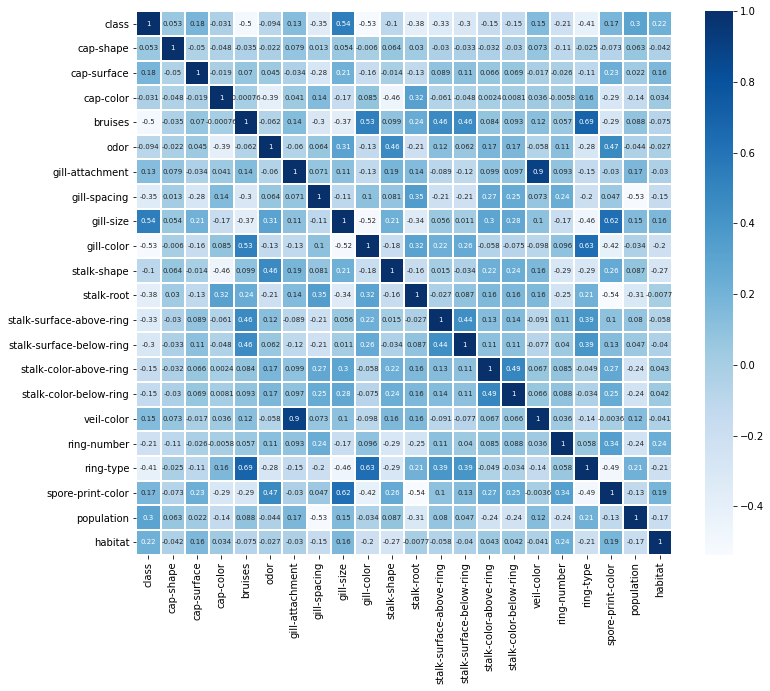

In [18]:
plt.figure(figsize=(12,10))


sns.heatmap(df_mushroom.corr(),linewidths=.1,cmap="Blues", annot=True, annot_kws={"size": 7})

plt.yticks(rotation=0);

# plotitng the below graph on attributes of the data we can see that the best classification can be based on gill-color therefore making an observation on gill color is that it can be break into two parts one above 3 red color and one below 3 blue color

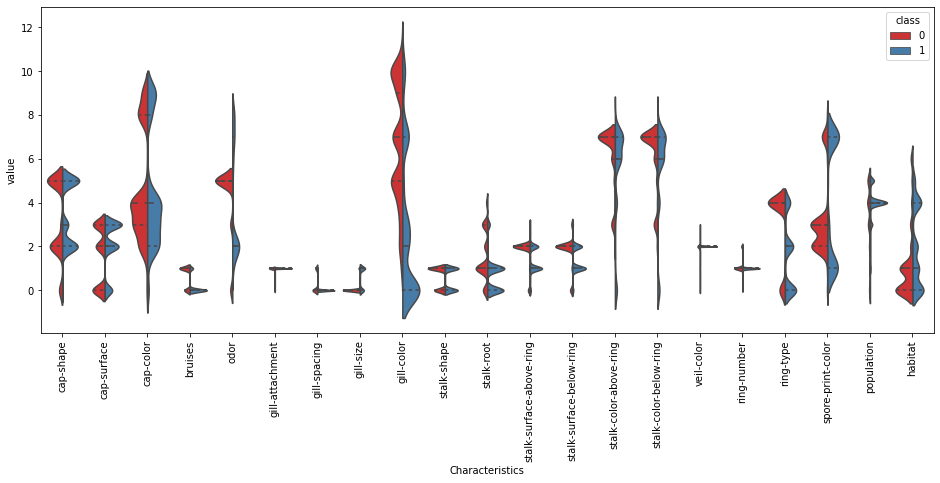

In [19]:
df_det = pd.melt(df_mushroom, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_det, inner = 'quartile', palette = 'Set1')
df_no_class = df_mushroom.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

Looking closely the feature of gill color for different values we can see that if gill color < 3.5 then class 1 is prominent else class 0 is prominent

C:\Users\denti\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\denti\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\denti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


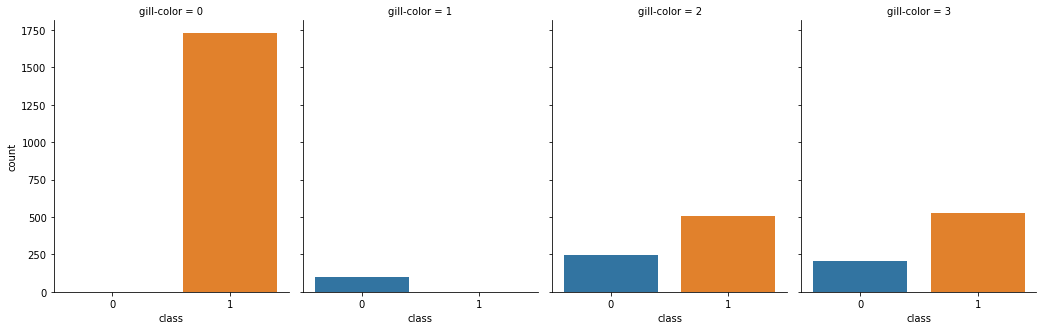

In [20]:
new_var = df_mushroom[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);

C:\Users\denti\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\denti\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\denti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


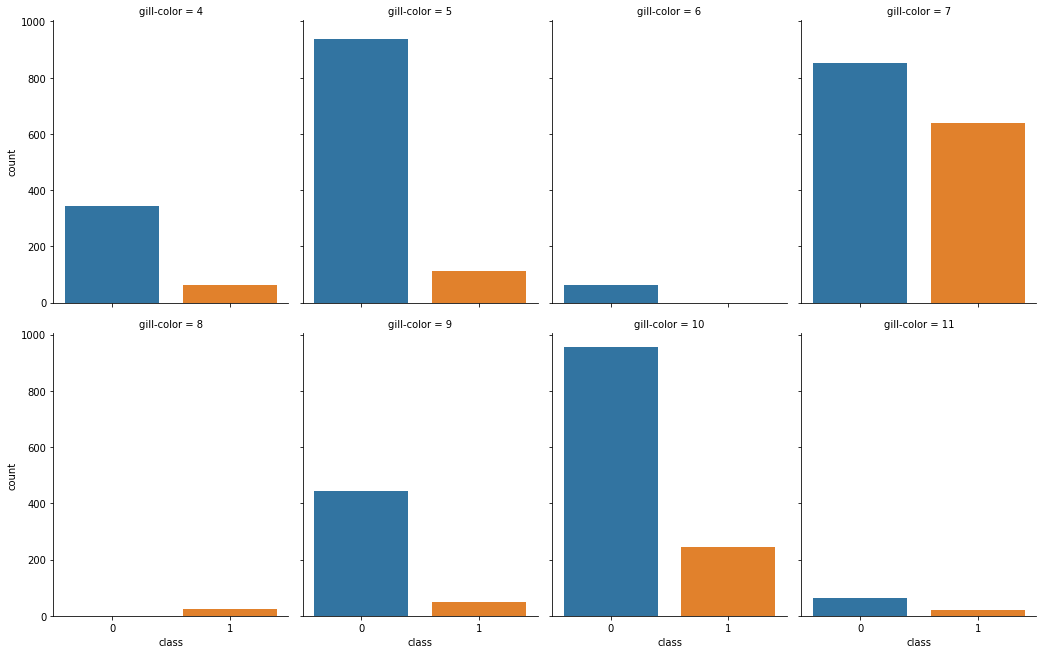

In [21]:
new_var=df_mushroom[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);

In [22]:
#Splitting the data into train and test
Y = df_mushroom['class']
X = df_mushroom[df_mushroom.columns[1:]]
X_train, X_test, y_train, y_test = train_test_split( 
          X, Y, test_size = 0.35, random_state = 100)

Plotting the Decision Tree below:

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

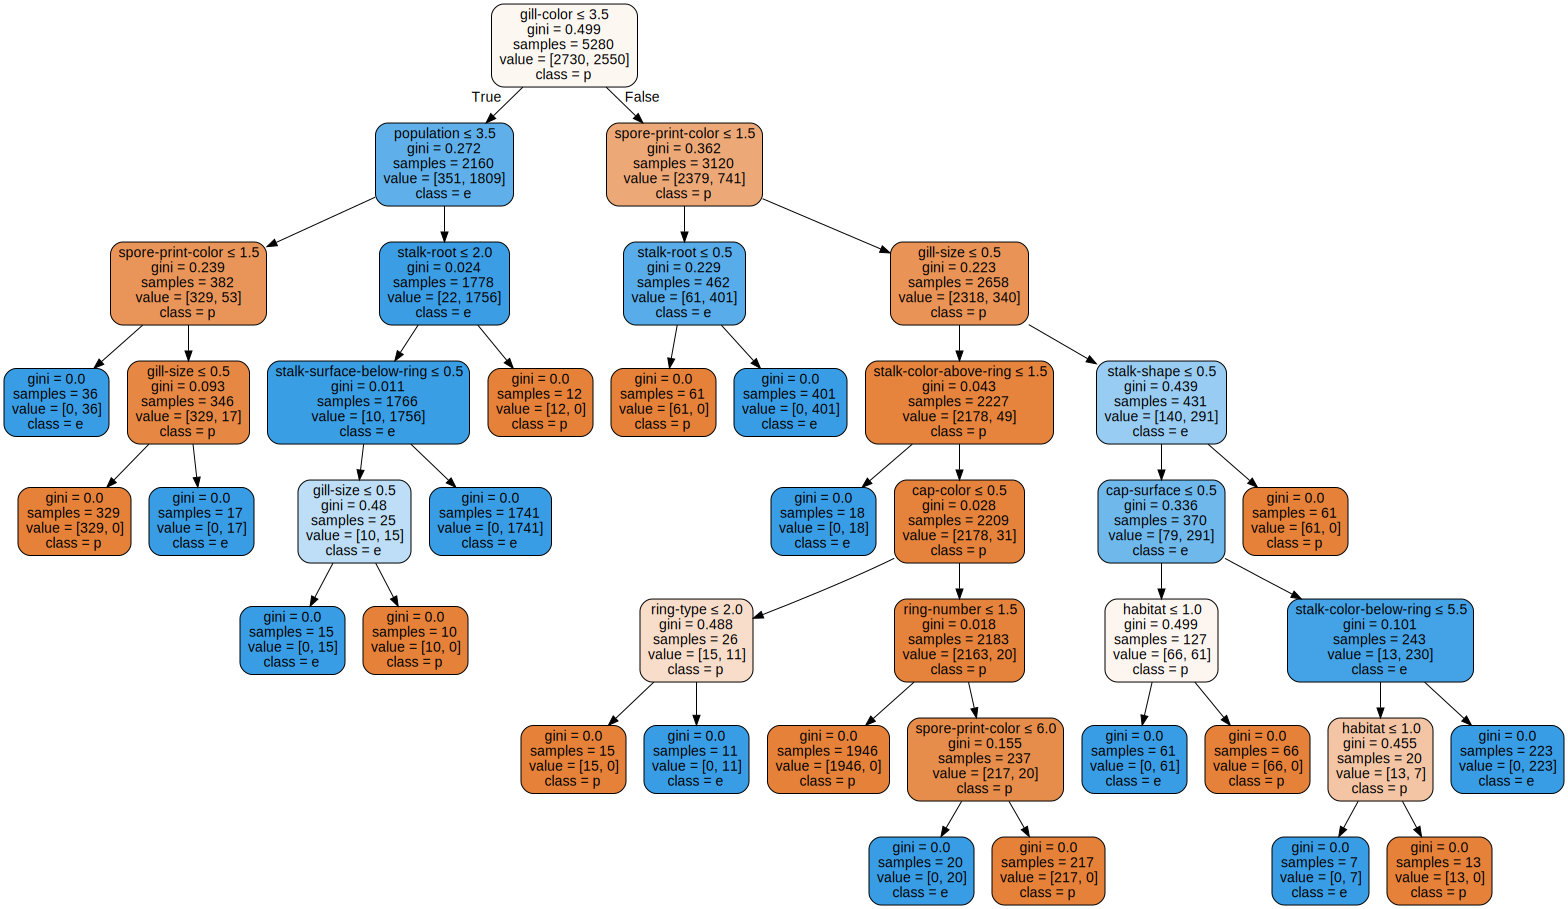

In [24]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin' 
dot_data = export_graphviz(dt, out_file=None,
 class_names=['p','e'],                          
 feature_names=X.columns, 
 filled=True, rounded=True, 
 special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [25]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))
# Here we can see that for both 0 and 1 precision and recall is 1

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1478
           1       1.00      1.00      1.00      1366

    accuracy                           1.00      2844
   macro avg       1.00      1.00      1.00      2844
weighted avg       1.00      1.00      1.00      2844

Test Accuracy: 100.0%


Below are the rules that are learned with the help of decision tree

In [26]:
# Below are the rules learnt by decision tree 

from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import export_text

r = export_text(dt, feature_names=(list(X_train.columns)))
print(r)

|--- gill-color <= 3.50
|   |--- population <= 3.50
|   |   |--- spore-print-color <= 1.50
|   |   |   |--- class: 1
|   |   |--- spore-print-color >  1.50
|   |   |   |--- gill-size <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- gill-size >  0.50
|   |   |   |   |--- class: 1
|   |--- population >  3.50
|   |   |--- stalk-root <= 2.00
|   |   |   |--- stalk-surface-below-ring <= 0.50
|   |   |   |   |--- gill-size <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- gill-size >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- stalk-surface-below-ring >  0.50
|   |   |   |   |--- class: 1
|   |   |--- stalk-root >  2.00
|   |   |   |--- class: 0
|--- gill-color >  3.50
|   |--- spore-print-color <= 1.50
|   |   |--- stalk-root <= 0.50
|   |   |   |--- class: 0
|   |   |--- stalk-root >  0.50
|   |   |   |--- class: 1
|   |--- spore-print-color >  1.50
|   |   |--- gill-size <= 0.50
|   |   |   |--- stalk-color-above-ring <= 1.50
|   |   |   |   |--- class: 1
|

In [27]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

Calculation of Accuracy, precision and recall for the depth 1 to 7 is as below

In [28]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [29]:
score = []
precision = []
recall = []
result = {}
print("Accuracy, Precision, recall")
index = range(1,8)
for i in index:
    clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=i)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    s    = clf.score(X_test, y_test)
    p = metrics.precision_score(y_test, clf.predict(X_test))
    r    = metrics.recall_score(y_test, clf.predict(X_test))
    result = {}
    print(s,p,r)
    score.append(s)
    precision.append(p)
    recall.append(r)    
    
#    result[len(y_train)] = (score, precision, recall)

Accuracy, Precision, recall
0.7285513361462729 1.0 0.43484626647144947
0.9159634317862166 0.9787595581988106 0.8433382137628112
0.9539381153305204 0.9376328844790929 0.9685212298682284
0.9539381153305204 0.9376328844790929 0.9685212298682284
0.9781997187060478 0.9894894894894894 0.9648609077598829
0.9869901547116737 0.9736279401282965 1.0
1.0 1.0 1.0


In [30]:
## Below is the 2D table for Depth Vs Purity
print("Depth, Purity")
index = range(1,8)
for i in index:
    clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=i)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    s    = clf.score(X_test, y_test)
    p = metrics.precision_score(y_test, clf.predict(X_test))
    r    = metrics.recall_score(y_test, clf.predict(X_test))
    print(i,s)    


Depth, Purity
1 0.7285513361462729
2 0.9159634317862166
3 0.9539381153305204
4 0.9539381153305204
5 0.9781997187060478
6 0.9869901547116737
7 1.0



#Hence we can see that as we increases the depth score , precision and recall moved closer. However, It 
#can seen that at depth 5 precision is higher than recall

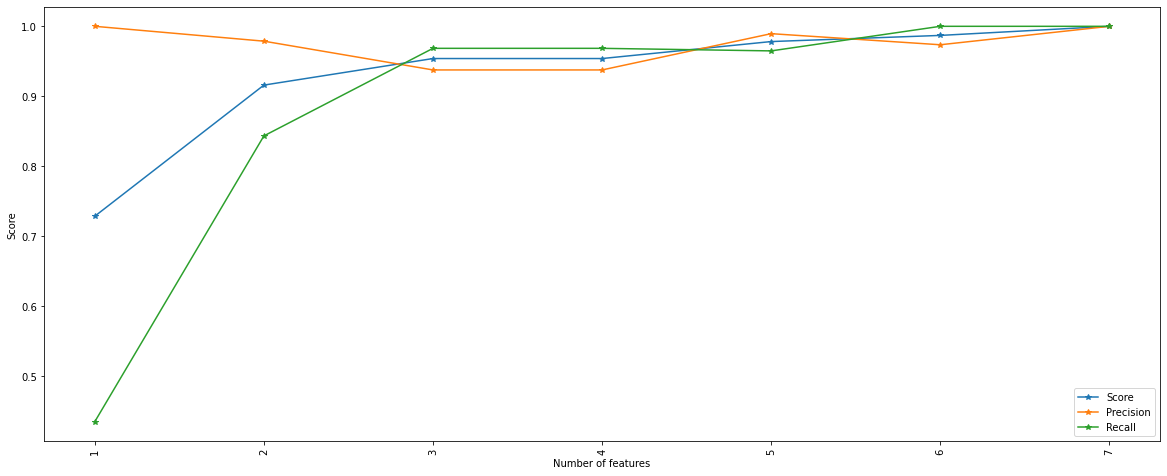

In [31]:
pd.DataFrame({'Score': score, 'Precision': precision, 'Recall': recall}, index=index).plot(figsize=(20,8), marker='*')
plt.xticks(index, rotation=90)
plt.xlabel('Number of features')
plt.ylabel('Score');    

#Hence we can see that as we increases the depth score , precision and recall moved closer. However, It 
#can seen that at depth 5 precision is higher than recall

Plotting the graph we can see that after decision threshold recall curve falls drastically 

Text(0.5, 1.0, 'Precision-Recall Curve')

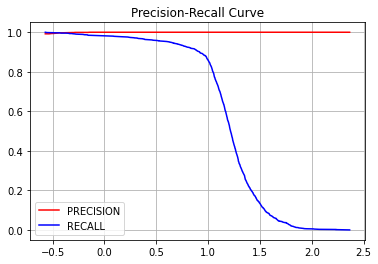

In [33]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
  
decision_function = clf.decision_function(X_test) 
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, decision_function)
  
# Plotting the graph we can see that after decision threshold recall curve falls drastically 
plt.plot(threshold, precision[:-1], c ='r', label ='PRECISION')
plt.plot(threshold, recall[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall Curve')

 Purity Measure Entropy and Purity threshold = 0.6 , Similarly we will calculate for other values and see that after 0.9 recall decreases as shown in the graph above

In [34]:
import sklearn.metrics as metrics
print("Accuracy, Precision, recall")
score=[] ## Accuracy 
precision=[] ## Precision 
recall = []  ### Recall 
index = range(1,8)
for i in index:
    clf = DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.4, max_depth=i)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    s    = clf.score(X_test, y_test)
    p = metrics.precision_score(y_test, clf.predict(X_test))
    r    = metrics.recall_score(y_test, clf.predict(X_test))
    print("Depth=",i,",",s,",",p,",",r)
    score.append(s)
    precision.append(p)
    recall.append(r)

Accuracy, Precision, recall
Depth= 1 , 0.519690576652602 , 0.0 , 0.0
Depth= 2 , 0.519690576652602 , 0.0 , 0.0
Depth= 3 , 0.519690576652602 , 0.0 , 0.0
Depth= 4 , 0.519690576652602 , 0.0 , 0.0
Depth= 5 , 0.519690576652602 , 0.0 , 0.0
Depth= 6 , 0.519690576652602 , 0.0 , 0.0
Depth= 7 , 0.519690576652602 , 0.0 , 0.0


C:\Users\denti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\denti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\denti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\denti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision 